In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/agaricus-lepiota.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
column_names = {0:'classes', 1:"cap-shape", 2:"cap-surface", 3:"cap-color", 
                4: "bruises?", 5:"odor", 6:"gill-attachment", 7:"gill-spacing", 
                8:"gill-size", 9:"gill-color", 10:"stalk-shape", 
                11:'stalk-root', 12:'stalk-surface-above-ring', 13:'stalk-surface-below-ring', 
                14:'stalk-color-above-ring', 15:'stalk-color-below-ring', 
                16:'veil-type', 17:'veil-color', 18:'ring-number', 
                19:'ring-type', 20:'spore-print-color', 
                21:'population', 22:'habitat'}
df = df.rename(columns=column_names)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [6]:
df= df.drop('stalk-root', axis=1)

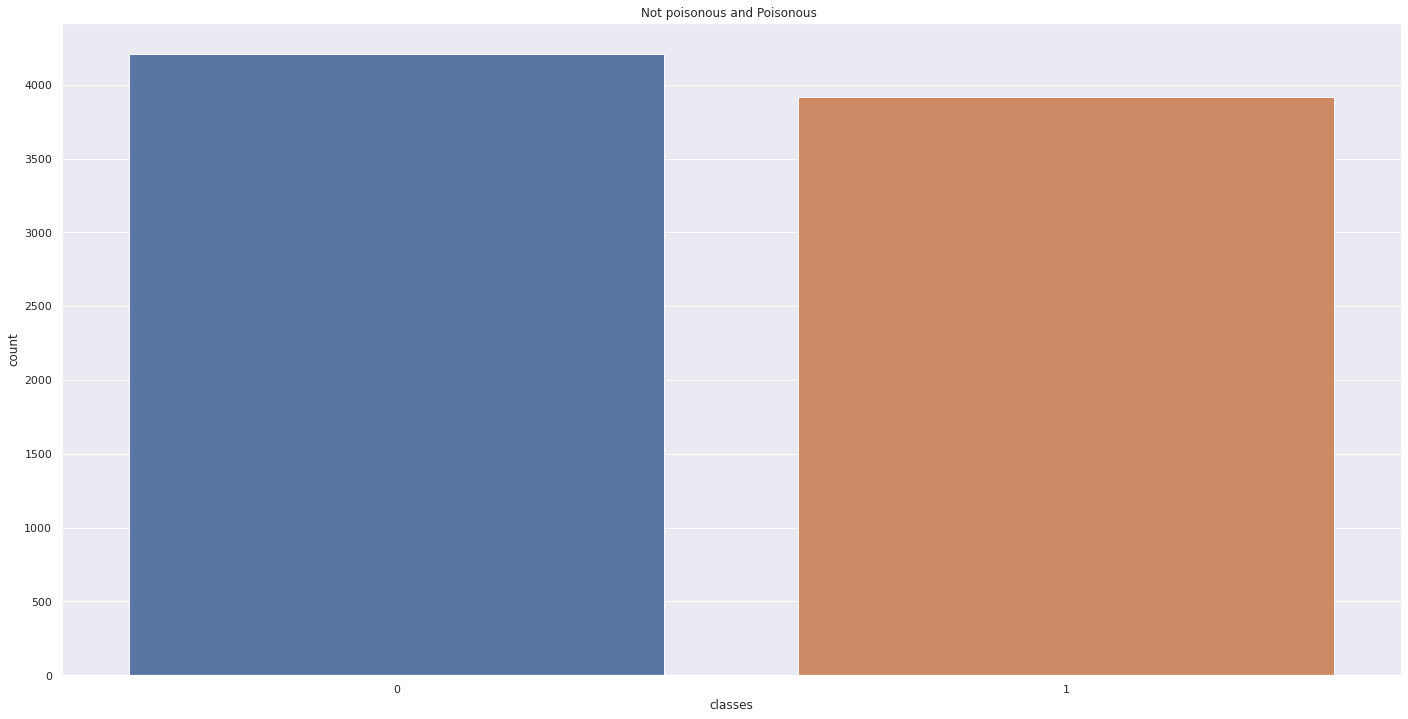

In [7]:
# plotting a countplot
sns.set()
plt.figure(figsize=(24,12))
sns.countplot(df.classes)
plt.title('Not poisonous and Poisonous ')
plt.show()

In [8]:
y= df['classes']
X=df.drop('classes', axis=1)
#dummy variables
X= pd.get_dummies(X, columns= X.columns, drop_first=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=3)

In [9]:
dt = DecisionTreeClassifier(max_depth=5, random_state=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [10]:
y_pred = dt.predict(X_test)

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(dt, 
                out_file='decision_tree.dot',
                feature_names=X.columns,
                class_names=['edible', 'poisonous']);

In [12]:
# defining a confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(f'confusion matrix: {cm}')
print('\n')
print(f'accuracy: {accuracy_score(y_pred, y_test)}')

confusion matrix: [[1279    0]
 [   4 1155]]


accuracy: 0.9983593109105825


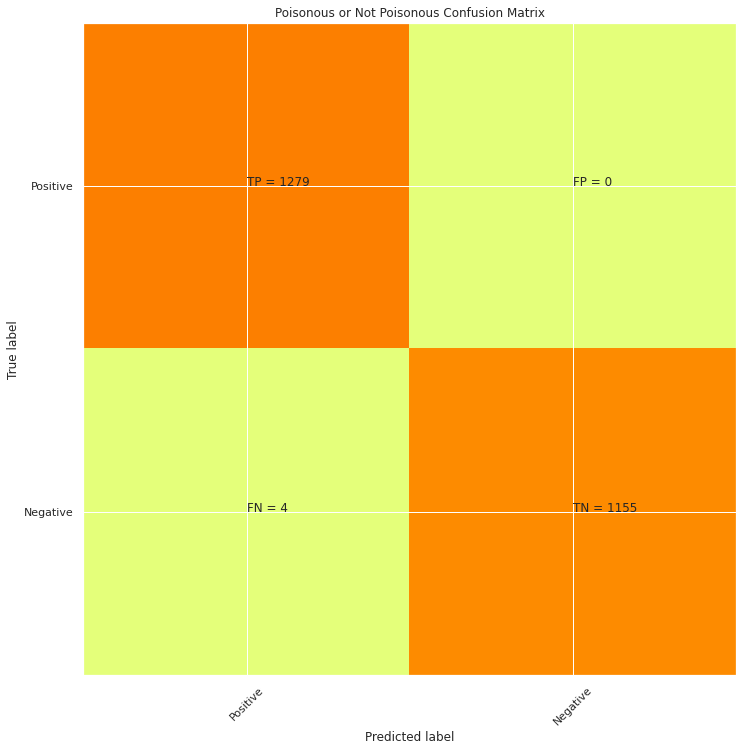

In [13]:
sns.set()
plt.figure(figsize=(24,12))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Positive','Negative']
plt.title('Poisonous or Not Poisonous Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TP','FP'], ['FN', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Conclusion
It was able to accurately differentiate between an edible and poisonous mushroom every single time. More data may be needed to fully tell how our model performs as there are roughly 140,000 species of mushrooms in the world and less than 10% of them are edible. Becareful don't just eat any Mushroom.